### Скачать и приготовить датасет Московского или Лондонского метро для решения стандартной задачи Pagerank. Вывести топ-5 станций подземки по такому ранжированию.

In [1]:
import pandas as pd

df = pd.read_csv('metro.csv', encoding='windows-1251', sep=';').set_index('Станция - Название (Номер)')

df.head()

,1,2,3,4,5,6,7,8,9,10,...,250,251,252,253,254,255,256,257,258,259
Станция - Название (Номер),,,,,,,,,,,,,,,,,,,,,
Саларьево - Сокольническая (1),0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Румянцево - Сокольническая (2),1,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Тропарёво - Сокольническая (3),0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Юго-Западная - Сокольническая (4),0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Проспект Вернадского - Сокольническая (5),0,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
import numpy as np


def pagerank(matrix, max_iter=1000):
    n = matrix.shape[0]
    pagerank_vector = np.ones(n) / n
    
    C = 0.85
    for i in range(max_iter):
        new_pagerank_vector = (1 - C) / n + C * matrix.dot(pagerank_vector)
        if np.allclose(new_pagerank_vector, pagerank_vector):
            break
        pagerank_vector = new_pagerank_vector
        
    return pagerank_vector


pagerank_vector = pagerank(df.values)
top_5_stations = np.argsort(pagerank_vector)[::-1][:5]
top_5_stations_names = df.index[top_5_stations]
top_5_stations_names

Index(['Киевская - Филёвская (76)', 'Красногвардейская - Замоскворецкая (24)',
       'Лермонтовский проспект - Таганско-Краснопресненская (120)',
       'Боровицкая - Серпуховско-Тимирязевская (174)',
       'Библиотека имени Ленина - Сокольническая (12)'],
      dtype='object', name='Станция - Название (Номер)')

### Применить метод Simrank к графу Московской подземки

In [3]:
import numpy as np


def simrank(graph, C=0.8, max_iter=100, eps=1e-4):
    N = len(graph)
    sim_matrix = np.ones((N, N))

    def simrank_score(u, v):
        if u == v:
            return 1.0
        else:
            neighbors_u = [i for i, x in enumerate(graph[u]) if x != 0]
            neighbors_v = [i for i, x in enumerate(graph[v]) if x != 0]
            if len(neighbors_u) == 0 or len(neighbors_v) == 0:
                return 0.0
            else:
                score = 0.0
                for a in neighbors_u:
                    for b in neighbors_v:
                        score += sim_matrix[a][b]
                return (C / (len(neighbors_u) * len(neighbors_v))) * score

    # Итерации метода SimRank
    for _ in range(max_iter):
        prev_sim_matrix = np.copy(sim_matrix)
        for i in range(N):
            for j in range(N):
                sim_matrix[i][j] = simrank_score(i, j)
        if np.allclose(sim_matrix, prev_sim_matrix, atol=eps):
            break

    return sim_matrix

Найдем максимально похожие станции:

In [4]:
res = simrank(df.values, C=0.85, max_iter=10000)

Выведем такие пары станций, которые располагаются на разных ветках и при этом являются похожими:

In [5]:
stantions = list(df.index)
lines = []

for i, stantion in enumerate(stantions):
    stantion, line = [str.strip(x) for x in stantion.split(' - ')]
    line = line.split('(')[0].strip()
    lines.append(line)
    stantions[i] = stantion

n_pairs = 10
pairs = []
sorted_indices = np.argsort(res, axis=None)
row_indices, col_indices = np.unravel_index(sorted_indices, res.shape)
for i in reversed(range(len(sorted_indices))):
    if n_pairs == 0:
        break
        
    node_i = row_indices[i]
    node_j = col_indices[i]
    if node_i == node_j or (node_j, node_i) in pairs:
        continue
    if lines[node_i] != lines[node_j]:
        pairs.append((node_i, node_j))
        print(stantions[node_i], stantions[node_j], res[node_i, node_j])
        n_pairs -= 1

Зябликово Алма-Атинская 0.5980063691611145
Жулебино Косино 0.48327766526870497
Локомотив Бульвар Рокоссовского 0.4800630669371001
Черкизовская Бульвар Рокоссовского 0.4340138961131794
Ясенево Битцевский парк 0.4303514660172156
Зябликово Домодедовская 0.4228813580751381
Выхино Косино 0.4195513548645174
Новоясеневская Лесопарковая 0.4120329348582369
Бульвар Дмитрия Донского Улица Скобелевская 0.40941610469632334
Шипиловская Красногвардейская 0.4070604741544745


Судя по получаемым результатам, алгоритм считает соседние станции разных веток похожими.

### Сгенерировать случайные разреженные графы и сравнить производительность реализаций Pagerank с CSR-форматом и без него

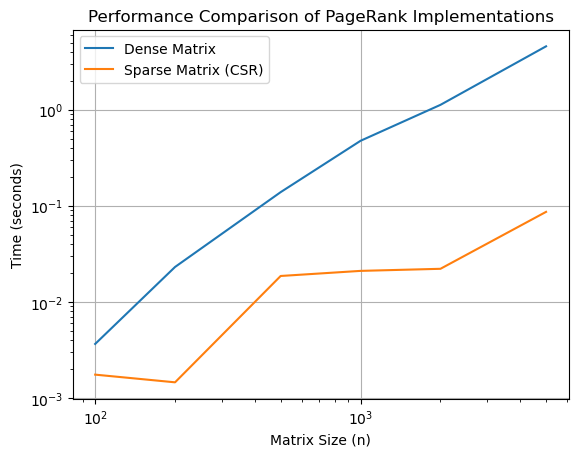

In [12]:
import numpy as np
from scipy.sparse import csr_matrix, random
import time
import matplotlib.pyplot as plt


# Генерация случайного разреженного графа
def generate_sparse_graph(n, density):
    matrix = random(n, n, density=density, format='csr')
    return matrix

# Преобразование CSR матрицы в плотную матрицу
def csr_to_dense(matrix):
    return matrix.toarray()

# Основная функция для сравнения производительности
def compare_performance(n, density, n_repeat=5):
    sparse_matrix = generate_sparse_graph(n, density)
    dense_matrix = csr_to_dense(sparse_matrix)

    sum_time = 0
    for i in range(n_repeat):
        start_time = time.perf_counter()
        result_dense = pagerank(dense_matrix)
        dense_time = time.perf_counter() - start_time
        sum_time += dense_time
    dense_time = sum_time / n_repeat
    
    n_repeat = 3
    sum_time = 0
    for i in range(n_repeat):
        start_time = time.perf_counter()
        result_sparse = pagerank(sparse_matrix)
        sparse_time = time.perf_counter() - start_time
        sum_time += sparse_time
    sparse_time = sum_time / n_repeat

    return dense_time, sparse_time


def experiment(n_values=[100, 200, 500, 1000, 2000, 5000], density=0.01):
    dense_times = []
    sparse_times = []
    
    for n in n_values:
        dense_time, sparse_time = compare_performance(n, density)
        dense_times.append(dense_time)
        sparse_times.append(sparse_time)
    
    # Построение графика
    plt.plot(n_values, dense_times, label='Dense Matrix')
    plt.plot(n_values, sparse_times, label='Sparse Matrix (CSR)')
    plt.xlabel('Matrix Size (n)')
    plt.ylabel('Time (seconds)')
    plt.title('Performance Comparison of PageRank Implementations')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()


experiment(density=0.01)

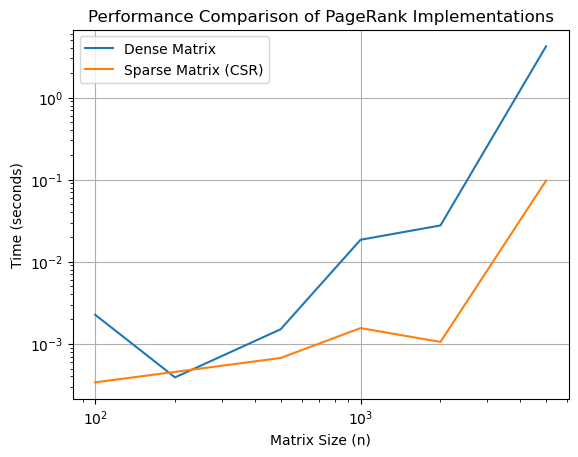

In [13]:
experiment(density=0.001)

Проверим, что выдаются одинаковые результаты в вычислениях:

In [14]:
sparse_matrix = generate_sparse_graph(400, 0.001)
dense_matrix = csr_to_dense(sparse_matrix)

result_sparse = pagerank(sparse_matrix)
result_dense = pagerank(dense_matrix)

assert np.allclose(result_sparse, result_dense)

C ростом размера матрицы выигрыш становиться очевиднее